<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/39_Advanced_TensorFlow_Techniques_for_CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **39. Advanced TensorFlow Techniques for CIFAR-10 Image Classification**

In [ ]:
pip install tensorflow


In [ ]:
pip install tensorflow==2.15.0

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install tensorflow==2.6.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.6.0


In [ ]:
pip install keras==<version_number>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install keras==<version_number>'


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index, classes):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [ ]:
y_test = np.squeeze(y_test)

In [ ]:
y_train = np.squeeze(y_train)

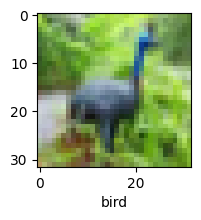

In [ ]:
plot_sample(X_train, y_train, 6, classes)

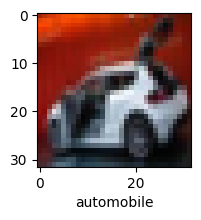

In [ ]:
plot_sample(X_test, y_test, 6, classes)

**Normalizeing The Data**

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=SGD(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[Accuracy()])

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


In [ ]:
y_train_categorical = to_categorical(y_train, num_classes=10)

In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 411s 263ms/step - loss: 1.8127 - accuracy: 0.3552


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classidication Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classidication Report: 
               precision    recall  f1-score   support

           0       0.42      0.37      0.39      1000
           1       0.55      0.32      0.41      1000
           2       0.38      0.13      0.19      1000
           3       0.31      0.35      0.33      1000
           4       0.38      0.44      0.41      1000
           5       0.41      0.23      0.29      1000
           6       0.51      0.43      0.47      1000
           7       0.57      0.35      0.43      1000
           8       0.26      0.86      0.40      1000
           9       0.50      0.29      0.37      1000

    accuracy                           0.38     10000
   macro avg       0.43      0.38      0.37     10000
weighted avg       0.43      0.38      0.37     10000



In [ ]:
from keras import layers, Sequential

cnn = Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(cnn)

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5202 - accuracy: 0.4553
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2265 - accuracy: 0.5709
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1088 - accuracy: 0.6146
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0244 - accuracy: 0.6440
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9725 - accuracy: 0.6618
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9280 - accuracy: 0.6811
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8846 - accuracy: 0.6932
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8509 - accuracy: 0.7048
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8186 - accuracy: 0.7138
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.7385 - accuracy: 0.3778


[1.7385131120681763, 0.37779998779296875]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

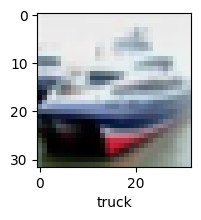

In [ ]:
plot_sample(X_test, y_test, 1, classes)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[4.06358065e-03, 7.42771488e-04, 2.74271518e-02, 7.77629554e-01,
        5.38736582e-03, 9.27630067e-02, 3.47213559e-02, 1.74301292e-03,
        5.54727875e-02, 4.93901207e-05],
       [1.11988338e-03, 4.10697013e-02, 5.38041718e-08, 1.04491569e-07,
        5.55842519e-08, 4.80872586e-09, 8.11202483e-08, 5.96895811e-10,
        9.57501292e-01, 3.08806426e-04],
       [6.41271114e-01, 6.62778504e-03, 6.97191013e-03, 9.62690858e-04,
        1.10029745e-04, 9.21187384e-05, 3.06150905e-05, 1.16300664e-03,
        3.36881012e-01, 5.88969002e-03],
       [6.42176926e-01, 4.30207849e-02, 1.11734550e-02, 4.85954428e-04,
        1.82761659e-03, 1.83595530e-05, 4.67406877e-04, 5.08851263e-05,
        2.99887419e-01, 8.91160336e-04],
       [3.43796637e-06, 3.69947134e-06, 2.00654175e-02, 5.10088243e-02,
        8.90281260e-01, 1.51325355e-03, 3.70805487e-02, 1.18938378e-05,
        3.07250702e-05, 9.94303377e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

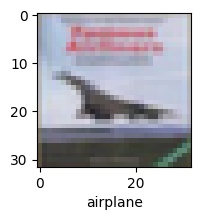

In [ ]:
plot_sample(X_test, y_test, 3, classes)

In [ ]:
print("Classificattion Report: \n",classification_report(y_test, y_classes))

Classificattion Report: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68      1000
           1       0.71      0.80      0.75      1000
           2       0.53      0.48      0.50      1000
           3       0.48      0.40      0.44      1000
           4       0.58      0.61      0.60      1000
           5       0.51      0.64      0.57      1000
           6       0.77      0.68      0.72      1000
           7       0.74      0.70      0.72      1000
           8       0.74      0.76      0.75      1000
           9       0.77      0.66      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

